In [1]:
# matplotlib_intro.py
"""Python Essentials: Intro to Matplotlib.
Nathan Schill
Sec. 3
Thurs. Sept. 21, 2022
"""

import numpy as np
from matplotlib import pyplot as plt

[0.00780969 0.00444415 0.00292368 0.00248372 0.00203918 0.00166348
 0.00141372 0.00124435 0.00111454 0.00098347]


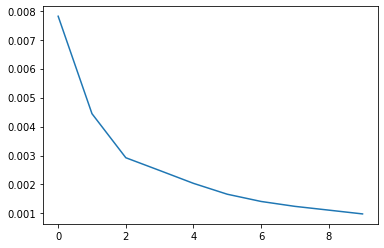

In [10]:
# Problem 1
def var_of_means(n):
    """Construct a random matrix A with values drawn from the standard normal
    distribution. Calculate the mean value of each row, then calculate the
    variance of these means. Return the variance.

    Parameters:
        n (int): The number of rows and columns in the matrix A.

    Returns:
        (float) The variance of the means of each row.
    """
    A = np.random.normal(size=(n, n))
    return np.var(np.mean(A, axis=1))

def prob1():
    """Create an array of the results of var_of_means() with inputs
    n = 100, 200, ..., 1000. Plot and show the resulting array.
    """
    result = np.array([var_of_means(n) for n in range(100, 1001, 100)])
    print(result)
    plt.plot(result)
    plt.show()
prob1()

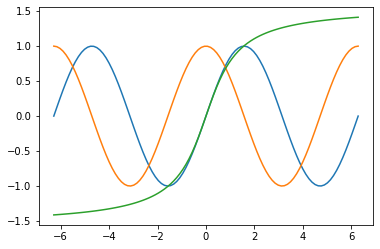

In [11]:
# Problem 2
def prob2():
    """Plot the functions sin(x), cos(x), and arctan(x) on the domain
    [-2pi, 2pi]. Make sure the domain is refined enough to produce a figure
    with good resolution.
    """
    
    x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    [plt.plot(x, f(x)) for f in (np.sin, np.cos, np.arctan)]
    plt.show()
prob2()

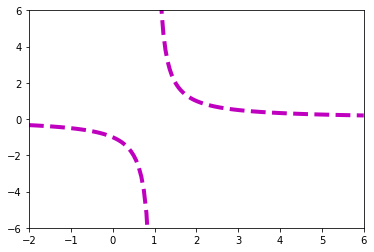

In [12]:
# Problem 3
def prob3():
    """Plot the curve f(x) = 1/(x-1) on the domain [-2,6].
        1. Split the domain so that the curve looks discontinuous.
        2. Plot both curves with a thick, dashed magenta line.
        3. Set the range of the x-axis to [-2,6] and the range of the
           y-axis to [-6,6].
    """
    x1 = np.linspace(-2, 0.99, 50)
    x2 = np.linspace(1.01, 6, 100)

    plt.plot(x1, 1/(x1-1), 'm--', linewidth=4)
    plt.plot(x2, 1/(x2-1), 'm--', linewidth=4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()
prob3()

C:\Users\BYU Rental\AppData\Local\Temp\ipykernel_4740\447637129.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


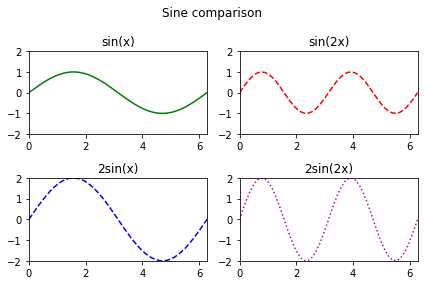

In [13]:
# Problem 4
def prob4():
    """Plot the functions sin(x), sin(2x), 2sin(x), and 2sin(2x) on the
    domain [0, 2pi].
        1. Arrange the plots in a square grid of four subplots.
        2. Set the limits of each subplot to [0, 2pi]x[-2, 2].
        3. Give each subplot an appropriate title.
        4. Give the overall figure a title.
        5. Use the following line colors and styles.
              sin(x): green solid line.
             sin(2x): red dashed line.
             2sin(x): blue dashed line.
            2sin(2x): magenta dotted line.
    """
    x = np.linspace(0, 2 * np.pi, 50)
    #f = lambda x: [np.sin(x), np.sin(2*x), 2*np.sin(x), 2*np.sin(2*x)]
    f = lambda o, i: (o + 1) * np.sin((i + 1) * x)
    #g = lambda x: [o * np.sin(i * x) for o in range(1, 3) for i in range(1, 3)]
    #h = lambda x: [[o * np.sin(i * x) for i in range(1, 3)] for o in range(1, 3)]
    
    '''I know this is complicated and not good coding style. I just wanted to experiment with what I can do using Python's abilities.'''
    fig, axes = plt.subplots(2, 2)
    styles = (('g-', 'r--'), ('b--', 'm:'))

    [axes[o][i].plot(x, f(o, i), styles[o][i]) for o in range(2) for i in range(2)]
    [(axes[o][i].set_xlim(0, 2*np.pi), axes[o][i].set_ylim(-2, 2)) for o in range(2) for i in range(2)]

    [axes[o][i].set_title(f'{"" if o == 0 else "2"}sin({"" if i == 0 else "2"}x)') for o in range(2) for i in range(2)]
    fig.suptitle('Sine comparison')
    
    fig.tight_layout()
    fig.show()
prob4()

In [6]:
# Problem 5
def prob5():
    """Visualize the data in FARS.npy. Use np.load() to load the data, then
    create a single figure with two subplots:
        1. A scatter plot of longitudes against latitudes. Because of the
            large number of data points, use black pixel markers (use "k,"
            as the third argument to plt.plot()). Label both axes.
        2. A histogram of the hours of the day, with one bin per hour.
            Label and set the limits of the x-axis.
    """
    data = np.load('FARS.npy')
    #print(data[:100,:])
    
    fig, axes = plt.subplots(1, 2)

    axes[0].plot(data[:, 1], data[:, 2], 'k,')
    axes[0].set_aspect('equal')
    axes[0].set_xlabel('Latitude')
    axes[0].set_ylabel('Longitude')

    axes[1].hist(data[:, 0], bins=np.arange(0, 25))
    axes[1].set_xlim(0, 24)
    axes[1].set_xlabel('Time')

    fig.show()

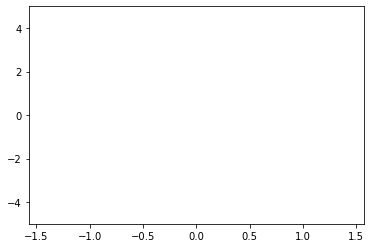

In [8]:
# Problem 6
def prob6():
    """Plot the function f(x,y) = sin(x)sin(y)/xy on the domain
    [-2pi, 2pi]x[-2pi, 2pi].
        1. Create 2 subplots: one with a heat map of f, and one with a contour
            map of f. Choose an appropriate number of level curves, or specify
            the curves yourself.
        2. Set the limits of each subplot to [-2pi, 2pi]x[-2pi, 2pi].
        3. Choose a non-default color scheme.
        4. Add a colorbar to each subplot.
    """
    x = np.linspace(-2 * np.pi, 2 * np.pi, 100); y = x.copy()
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X)*np.sin(Y) / (X*Y)
    
    plt.subplot(121)
    plt.pcolormesh(X, Y, Z, cmap='coolwarm')
    plt.colorbar()

    plt.subplot(122)
    plt.contour(X, Y, Z, 10, cmap='coolwarm')
    plt.colorbar()

    plt.show()

from matplotlib.animation import FuncAnimation
def sine_animation():
    # Calculate the data to be animated.
    x = np.linspace(0, 2*np.pi, 200)[:-1]
    y = np.sin(x)
    # Create a figure and set the window boundaries of the axes.
    fig = plt.figure()
    plt.xlim(0, 2*np.pi)
    plt.ylim(-1.2, 1.2)
    # Draw an empty line. The comma after 'drawing' is crucial.
    drawing, = plt.plot([],[])
    # Define a function that updates the line data.
    def update(index):
        drawing.set_data(x[:index], y[:index])
        return drawing, # Note the comma!
    def wave(index):
        drawing.set_data(x, np.roll(y, index))
        return drawing,
    a = FuncAnimation(fig, wave, frames=len(x), interval=10)
    plt.show()

def sine_cosine_animation():
    x = np.linspace(0, 2*np.pi, 200)[:-1]
    y1, y2 = np.sin(x), np.cos(x)
    fig = plt.figure()
    plt.xlim(0, 2*np.pi)
    plt.ylim(-1.2, 1.2)
    sin_drawing, = plt.plot([],[])
    cos_drawing, = plt.plot([],[])
    def update(index):
        sin_drawing.set_data(x[:index], y1[:index])
        cos_drawing.set_data(x[:index], y2[:index])
        return sin_drawing, cos_drawing,
    a = FuncAnimation(fig, update, frames=len(x), interval=10)
    plt.show()

def rose_animation_3D():
    theta = np.linspace(0, 2*np.pi, 200)
    x = np.cos(theta) * np.cos(6*theta)
    y = np.sin(theta) * np.cos(6*theta)
    z = theta / 10
    fig = plt.figure()
    ax = fig.gca(projection='3d') # Make the figure 3-D.
    ax.set_xlim3d(-1.2, 1.2) # Use ax instead of plt.
    ax.set_ylim3d(-1.2, 1.2)
    ax.set_aspect("auto")
    drawing, = ax.plot([],[],[]) # Provide 3 empty lists.
    # Update the first 2 dimensions like usual, then update the 3-D component.
    def update(index):
        drawing.set_data(x[:index], y[:index])
        drawing.set_3d_properties(z[:index])
        return drawing,
    a = FuncAnimation(fig, update, frames=len(x), interval=10, repeat=False)
    plt.show()

#sine_animation()
#sine_cosine_animation()
#rose_animation_3D()

def tangent_animation():
    n_pts = 75
    x = np.linspace(-np.pi/2, np.pi/2, n_pts)
    y = np.tan(x)
    fig = plt.figure()

    plt.xlim(-np.pi/2, np.pi/2)
    plt.ylim(-5, 5)

    drawing, = plt.plot([])

    def update(i):
        drawing.set_data(x[i if i < n_pts//2 else n_pts - i : i+n_pts//2 if i < n_pts//2 else 3*n_pts//2 - i], y[i if i < n_pts//2 else n_pts - i : i+n_pts//2 if i < n_pts//2 else 3*n_pts//2 - i])
        return drawing,
    
    a = FuncAnimation(fig, update, frames=len(x), interval=500//n_pts)
    plt.show()

anim = tangent_animation()